<h2>IMDB dateset</h2>
IMDB는 (영화 리뷰, 리뷰의 긍정부정 값)을 한 쌍의 데이터 값으로, 50,000개의 샘플을 모아 놓은 데이터 셋이다. 이 중 25,000개의 댓글 셈플은 트레이닝 샘플이며, 나머지 25,000개의 댓글 샘플은 테스팅 샘플이다.<br>
다시말해, 해당 데이터 셋에는 50000개의 영화 리뷰를 가지고 있으며, 모든 리뷰들은 결과 값(부정 혹은 긍적) 값을 결과 값으로 가지고 있다. 해당 데이터 셋의 결과 값이 이진 데이터라는 특성 때문에 해당 데이터 셋을 사용하는 신경망 모델의 목적은 주로 binary classification을 목적으로 한다.

해당 파일에서는 편의를 위해 데이터를 로드할 때, 가장 빈번하게 사용되는 20,000개의 단어들만 포함하여 로드하였다.

In [2]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test)=imdb.load_data(num_words=20000)

모델 내부에서 training을 위한 데이터와 이를 각 epoch에서 검증하기 위한 데이터를 분류 하기 위해 25,000개의 데이터를 분할하였다.<br>
25,000개이 샘플 중 20,000개는 트레이닝을 위한 샘플, 나머지 5,000개는 트레이닝 후 정확도 평가를 위한 validation 샘플로 두었다.

In [3]:
x_val=x_train[20000:]
y_val=y_train[20000:]

x_train=x_train[:20000]
y_train=y_train[:20000]

pad_sequence() function<br>
pad_sequence()라는 함수는 케라스에 내장되어 있는 함수로, 데이터 전처리를 하는 것이 그 용도이다. <br> 해당 함수를 사용하면, 샘플 간의 길이를 균등하게 맞출 수 있다.

In [5]:
from keras.preprocessing import sequence

x_train=sequence.pad_sequences(x_train, maxlen=200)
x_val=sequence.pad_sequences(x_val, maxlen=200)
x_test=sequence.pad_sequences(x_test, maxlen=200)

<h3>모델 구성</h3>

<h4>Sequential() 함수로 모델을 초기화 한다.</h4>

<h4>Embedding()층을 추가한다</h4>
Embedding()은 one-hot-encoding보다 훨씬 적은 공간을 사용한다. 또한 해당 층을 추가하면 단어 간의 연관성을 고려한 벡터가 만들어지기 때문에 훨씬 유의미한 훈련이 가능하다.

<h4>Dropout</h4>
Dropout은 훈련 중에 과대적합을 방지하기 위해서 추가된 층이다.

<h4>Conv1D</h4>
Convolutional Neural Network(CNN)은 주로 2차원으로 사용할 때 이미지 훈련에서 빈번하게 사용된다. 하지만 이 외의 분류 모델에서도 사용이 용이하다.
CNN은 지정한 갯수만큼의 fileter(합성곱 윈도우)를 가지고 데이터가 가지고 있는 패턴을 찾아낸다. 이 때, 필터를 많이 가지고 있을수록, 더 다양한 패턴을 인식하게 된다. 그러나 연산량은 많아진다.

<h4>GlobalMaxPooling</h4>
Pooling은 벡터에서 특징적인 값만 추출하는 과정이다. 특정한 벡터만 추출해서 사용하게 되면 과대적합 문제를 해결하는데에 도움을 줄 수 있다.
GlobalMaxPooling의 경우에는 여러 개의 벡터 정보 중에서 가장 큰 정보만 추출해오는 pooling 방법인다.

<h4>LSTM</h4>
LSTM은 Long Short-term Memory의 약자이다. 이는 기본적인 RNN 신경망 구조에서 변형된 형태이다. 기존의 RNN은 입력값의 시퀀스 길이가 길어질 때, 훈련이 반영이 잘 되지 않는 "Vanishing gradient"문제 떄문에 해당 모델이 구상되었다.
해당 모델은 훈련이 거듭될 때마다 결과 값을 기억하고 있는다. 다만, 새로운 입력값과 기억하고 있는 데이터의 연관 정도를 고려하여 기억 데이터의 일부분을 삭제하고 새로운 입력 값을 기억한다는 적이 해당 기법의 특이한 점이다.

<h4>출력층: Sigmoid 함수</h4>
해당 모델의 목적은 입력되는 리뷰의 긍정 부정을 판별하는 것이다. Binary classification에 적합한 Sigmoid 함수를 사용하였다.


<h4>CNN과 RNN을 혼합해서 사용하는 이유</h4>
<p><span style="color:red">
    CNN은 연산 부하가  RNN에 비해 적다. 그리고 CNN을 사용하여 학습한 신경망은 데이터의 특징값을 효과적으로 추출한다는 특징을 가지고 있다. 반면에 RNN은 연산 부하가 크기 때문에 많은 양의 데이터를 가지고 학습을 진행하기에는 무리가 있다.  <br>
    이를 해결하기 위해서 CNN을 RNN 학습을 시키기 전에 특징값만 추출하는 전처리 층처럼 사용한다. 그렇게 되면 샘플 데이터 중에서 특징적인 데이터를 추출해내면서 데이터의 크기를 줄여서 연산 속도와 예측 정확도를 높일 수 있다.
</span></p>

In [11]:
from keras.models import Sequential
from keras.layers import Embedding,Dense, Dropout, Conv1D, MaxPooling1D, LSTM

model=Sequential()
model.add(Embedding(20000, 128, input_length=200))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1,  activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 49, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,855,809
Trainable params: 2,855,809
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist=model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 121s 6ms/step - loss: 0.4131 - acc: 0.7960 - val_loss: 0.2929 - val_acc: 0.8760
Epoch 2/25
20000/20000 [==============================] - 118s 6ms/step - loss: 0.1850 - acc: 0.9319 - val_loss: 0.3148 - val_acc: 0.8786
Epoch 3/25
20000/20000 [==============================] - 119s 6ms/step - loss: 0.0942 - acc: 0.9682 - val_loss: 0.4087 - val_acc: 0.8636
Epoch 4/25
20000/20000 [==============================] - 117s 6ms/step - loss: 0.0562 - acc: 0.9823 - val_loss: 0.4505 - val_acc: 0.8676
Epoch 5/25
20000/20000 [==============================] - 114s 6ms/step - loss: 0.0279 - acc: 0.9925 - val_loss: 0.5239 - val_acc: 0.8682
Epoch 6/25
20000/20000 [==============================] - 112s 6ms/step - loss: 0.0227 - acc: 0.9926 - val_loss: 0.5424 - val_acc: 0.8650
Epoch 7/25
20000/20000 [==============================] - 113s 6ms/step - l

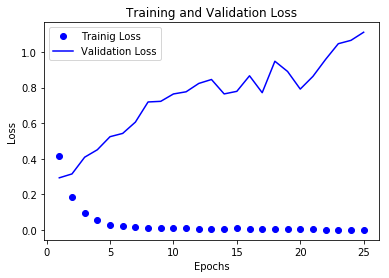

In [15]:
import matplotlib.pyplot as plt
hist_dict=hist.history
loss=hist_dict['loss']
val_loss=hist_dict['val_loss']

epochs=range(1,26)

plt.plot(epochs, loss, 'bo', label='Trainig Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

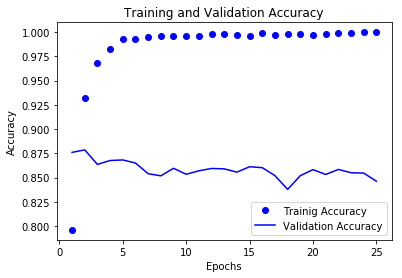

In [16]:
plt.clf()

acc=hist_dict['acc']
val_acc=hist_dict['val_acc']

epochs=range(1,26)

plt.plot(epochs, acc, 'bo', label='Trainig Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

In [17]:
result=model.evaluate(x_test, y_test)
print("Test Loss")
print(result[0])
print("Test Accuracy")
print(result[1])

25000/25000 [==============================] - 51s 2ms/step
Test Loss
1.1790727806279062
Test Accuracy
0.8368
